## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [37]:
# Use this cell to begin your analysis, and add as many as you would like!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

In [38]:
# Import data using pandas and see some of rows
office_df = pd.read_csv('datasets/office_episodes.csv')
office_df.sample(5)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
114,114,6,The Cover-Up,Michael becomes convinced that Donna is having...,8.1,2199,6.84,30,2010-05-06,NaN,Rainn Wilson,Gene Stupnitsky | Lee Eisenberg,False,0.46875
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,2013-05-09,NaN,David Rogers,Brent Forrester,False,0.90625
165,165,9,New Guys,Dwight and Jim are intimidated by the office's...,7.6,2074,4.28,23,2012-09-20,NaN,Greg Daniels,Greg Daniels,False,0.31250
6,6,2,The Dundies,"Very much unlike his staff, an overeager Micha...",8.7,4315,9.00,21,2005-09-20,NaN,Greg Daniels,Mindy Kaling,False,0.65625
47,47,3,Product Recall,Michael tries to be proactive during a waterma...,8.7,3138,7.56,21,2007-04-26,NaN,Randall Einhorn,Justin Spitzer | Brent Forrester,False,0.65625


In [39]:
# Mapping the scaled rating into four groups and assign it into new dataframe columns
grouped_rating = []
for rating in office_df['scaled_ratings']:
    if rating < 0.25:
        grouped_rating.append('bad')
    elif rating < 0.50:
        grouped_rating.append('fair')
    elif rating < 0.75:
        grouped_rating.append('good')
    else:
        grouped_rating.append('excellent')

# Add the list into dataframe
office_df['grouped_ratings'] = grouped_rating

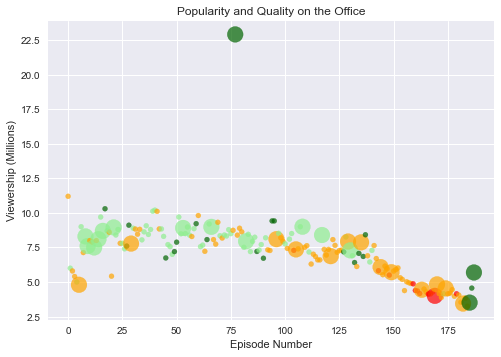

In [40]:
# Set colors and sizes for plotting
colors = {'bad':'red', 'fair':'orange', 'good':'lightgreen', 'excellent':'darkgreen'}
sizes = {True:250, False:25}

# Set the plot style to seaborn
plt.style.use('seaborn')

fig = plt.figure()
plt.scatter(office_df['episode_number'], office_df['viewership_mil'],
           c=office_df['grouped_ratings'].map(colors),
           s=office_df['has_guests'].map(sizes),
           alpha=0.7 
           )

plt.title('Popularity and Quality on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

In [41]:
# Get guest stars in the most watched Office episode
most_watched = max(office_df['viewership_mil'])
guest_stars = office_df['guest_stars'].loc[office_df['viewership_mil'] == most_watched]

top_star = guest_stars.values[0].split(',')[0]
print(top_star)

Cloris Leachman
